# PyGreentea Network Generator 

### Load the dependencies

In [1]:
%matplotlib inline

from __future__ import print_function
import h5py
import numpy as np
from numpy import float32, int32, uint8, dtype
import sys
import matplotlib.pyplot as plt


pygt_path = '../PyGreentea'
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), pygt_path))

import math

import PyGreentea as pygt

### Load the default network template

In [2]:
netconf = pygt.netgen.NetConf()

### Set the memory limits for the GPU

In [3]:
# We use cuDNN, so:
netconf.ignore_conv_buffer = True
# 4 GB total, ignore convolution buffer. Let's keep 0.5 GB for implementation dependent buffers.
netconf.mem_global_limit = 3.5 * 1024 * 1024 * 1024
# 4 GB convolution buffer limit
netconf.mem_buf_limit = 3.5 * 1024 * 1024 * 1024

### Explore possible network input/output shapes for the chosen settings

In [4]:
# We test memory usage for training
mode = pygt.netgen.caffe_pb2.TRAIN
# The minimum we're interested in
shape_min = [100,100,100]
# And maximum
shape_max = [200,200,200]
# We want Z == X == Y constrained
constraints = [None, lambda x: x[0], lambda x: x[1]]

netconf.u_netconfs[0].use_deconvolution_uppath = True

# Compute (can be quite intensive)
inshape, outshape, fmaps = pygt.netgen.compute_valid_io_shapes(netconf,mode,shape_min,shape_max,constraints=constraints)

++++ Valid: [100] => [100]
-- Invalid: [101] => []
-- Invalid: [102] => []
-- Invalid: [103] => []
-- Invalid: [104] => []
-- Invalid: [105] => []
-- Invalid: [106] => []
-- Invalid: [107] => []
++++ Valid: [108] => [108]
-- Invalid: [109] => []
-- Invalid: [110] => []
-- Invalid: [111] => []
-- Invalid: [112] => []
-- Invalid: [113] => []
-- Invalid: [114] => []
-- Invalid: [115] => []
++++ Valid: [116] => [116]
-- Invalid: [117] => []
-- Invalid: [118] => []
-- Invalid: [119] => []
-- Invalid: [120] => []
-- Invalid: [121] => []
-- Invalid: [122] => []
-- Invalid: [123] => []
++++ Valid: [124] => [124]
-- Invalid: [125] => []
-- Invalid: [126] => []
-- Invalid: [127] => []
-- Invalid: [128] => []
-- Invalid: [129] => []
-- Invalid: [130] => []
-- Invalid: [131] => []
++++ Valid: [132] => [132]
-- Invalid: [133] => []
-- Invalid: [134] => []
-- Invalid: [135] => []
-- Invalid: [136] => []
-- Invalid: [137] => []
-- Invalid: [138] => []
-- Invalid: [139] => []
++++ Valid: [140] => [140

### Visualization

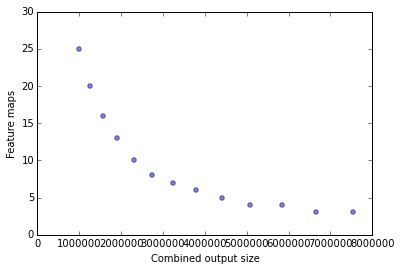

In [5]:
plt.figure()
# Combined output size versus feature map count
plt.scatter([x[0]*x[1]*x[2] for x in outshape], fmaps, alpha = 0.5)
plt.ylabel('Feature maps')
plt.xlabel('Combined output size')
plt.show()

### Pick parameters, actually generate and store the network

In [6]:
netconf.input_shape = inshape[0]
netconf.output_shape = outshape[0]
netconf.fmap_start = fmaps[0]

print ('Input shape: %s' % netconf.input_shape)
print ('Output shape: %s' % netconf.output_shape)
print ('Feature maps: %s' % netconf.fmap_start)

netconf.loss_function = "euclid"
train_net_conf_euclid, test_net_conf = pygt.netgen.create_nets(netconf)
netconf.loss_function = "malis"
train_net_conf_malis, test_net_conf = pygt.netgen.create_nets(netconf)

with open('net_train_euclid.prototxt', 'w') as f:
    print(train_net_conf_euclid, file=f)
with open('net_train_malis.prototxt', 'w') as f:
    print(train_net_conf_malis, file=f)
with open('net_test.prototxt', 'w') as f:
    print(test_net_conf, file=f)

Input shape: [100, 100, 100]
Output shape: [100, 100, 100]
Feature maps: 25
Shape: [0]
f: 1 w: [100, 100, 100] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [1]
f: 25 w: [98, 98, 98] d: [1, 1, 1]
WM: 2700
CM: 108000000
AM: 200000000
Shape: [2]
f: 25 w: [96, 96, 96] d: [1, 1, 1]
WM: 67500
CM: 2541218400
AM: 188238400
Shape: [3]
f: 25 w: [48, 48, 48] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [4]
f: 75 w: [46, 46, 46] d: [1, 1, 1]
WM: 202500
CM: 298598400
AM: 66355200
Shape: [5]
f: 75 w: [44, 44, 44] d: [1, 1, 1]
WM: 607500
CM: 788421600
AM: 58401600
Shape: [6]
f: 75 w: [22, 22, 22] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [7]
f: 225 w: [20, 20, 20] d: [1, 1, 1]
WM: 1822500
CM: 86248800
AM: 19166400
Shape: [8]
f: 225 w: [18, 18, 18] d: [1, 1, 1]
WM: 5467500
CM: 194400000
AM: 14400000
Shape: [9]
f: 225 w: [9, 9, 9] d: [1, 1, 1]
WM: 0
CM: 0
AM: 0
Shape: [10]
f: 675 w: [7, 7, 7] d: [1, 1, 1]
WM: 16402500
CM: 17714700
AM: 3936600
Shape: [11]
f: 675 w: [9, 9, 9] d: [1, 1, 1]
WM: 49207500
CM: 25004700
AM: 185